In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def percentstr2float(df, column):
    for idx, elem in enumerate(df[column]):
        if isinstance(elem, float): 
            continue
        try:
            numeric_value = float(elem[:-1]) / 100
        except:
            numeric_value = float(elem[:-1].replace(',', '.')) / 100
        df.loc[idx, column] = numeric_value
    return df

def comma2dot(df, column):
    for idx, elem in enumerate(df[column]):
        if not isinstance(elem, str): 
            continue
        numeric_value = float(elem.replace(',', '.'))        
        df.loc[idx, column] = numeric_value
    return df

## Nominale, ordinale und stetige Variablen

In [3]:
data_neurodermitis = pd.read_csv('data/Neurodermitis.csv')

In [4]:
data_neurodermitis

Patienten-ID Geschlecht  Alter  Gewicht   Schweregrad  Schweregrad kodiert
0             1          m     45       65        schwer                    3
1             2          m     65       87  mittelschwer                    2
2             3          f     34       57  mittelschwer                    2
3             4          m     54       98        leicht                    1
4             5          f     76       80        leicht                    1
5             6          f     74       78        schwer                    3
6             7          m     63       86        leicht                    1
7             8          m     58       73        schwer                    3
8             9          f     85       47  mittelschwer                    2
9            10          f     46       62        leicht                    1

## Absolute und relative Häufigkeiten

In [5]:
data_spanish_wines = pd.read_csv('data/SpanishWines.csv')

Using the hist() method on the data frame, produces a bar diagram of the absolute frequencies. 

In [6]:
data_spanish_wines.head()

Name Alcohol declared Alcohol measured Price Rating Price category  \
0   A0             12,5             12,9  4,88      E          Cheap   
1   A1             12,5             12,8  8,55      E      Expensive   
2   A2               13             13,1  5,85      E          Cheap   
3   A3             13,5             14,1  8,18     VG      Expensive   
4   A4             12,5             12,7  4,19     VG          Cheap   

           Price cat  
0  Cheap (< 6 euros)  
1  Moderately priced  
2  Cheap (< 6 euros)  
3  Moderately priced  
4  Cheap (< 6 euros)

<AxesSubplot: >

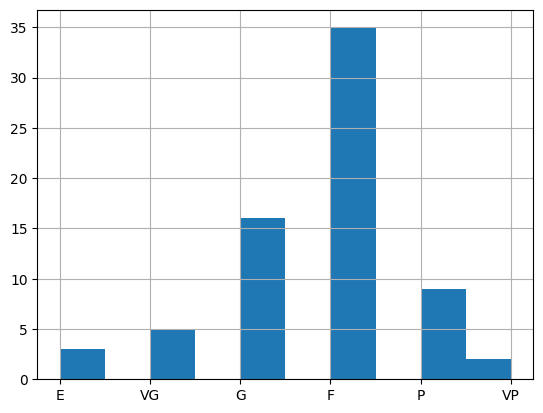

In [7]:
data_spanish_wines["Rating"].hist()

In order to display also the values of the absolute frequencies, we resort to the following trick. 

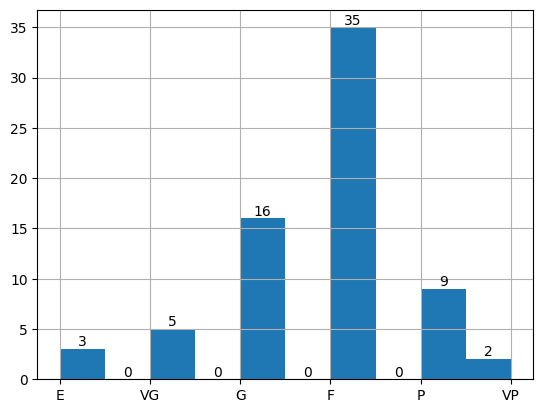

In [8]:
ax = data_spanish_wines["Rating"].hist()

for container in ax.containers:
    ax.bar_label(container)

Using the method value_counts() with options normalize=True, sort=False together with the plot.bar method displays a bar diagram of the relative frequencies. 

<AxesSubplot: >

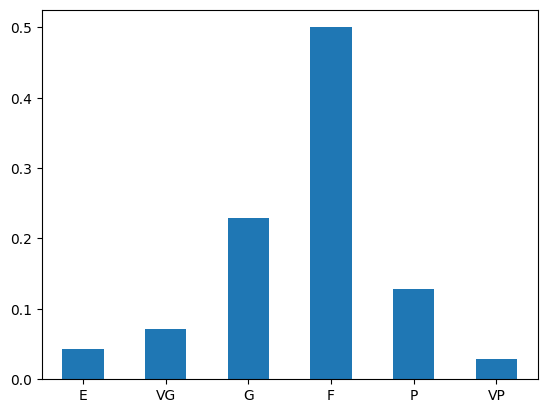

In [9]:
data_spanish_wines["Rating"].value_counts(normalize=True, sort=False).plot.bar(rot=0)

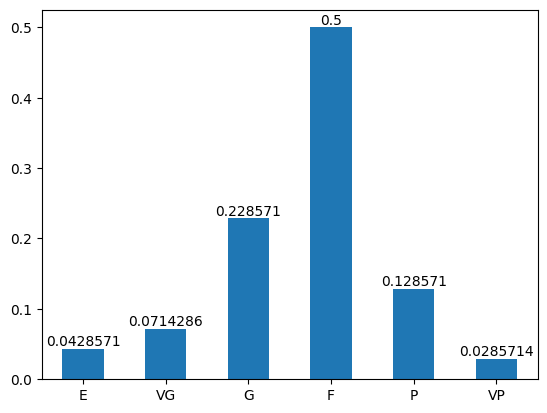

In [10]:
ax = data_spanish_wines["Rating"].value_counts(normalize=True, sort=False).plot.bar(rot=0)

for container in ax.containers:
    ax.bar_label(container)

## Balken-Diagramme (bar diagrams)

In [5]:
data_lotto = pd.read_csv('data/Lotto.csv')

In [12]:
data_lotto.dtypes

Number                          int64
Number of Drawings              int64
Relative Frequency             object
Date of most recent Drawing    object
dtype: object

In [6]:
data_lotto = percentstr2float(data_lotto, "Relative Frequency")

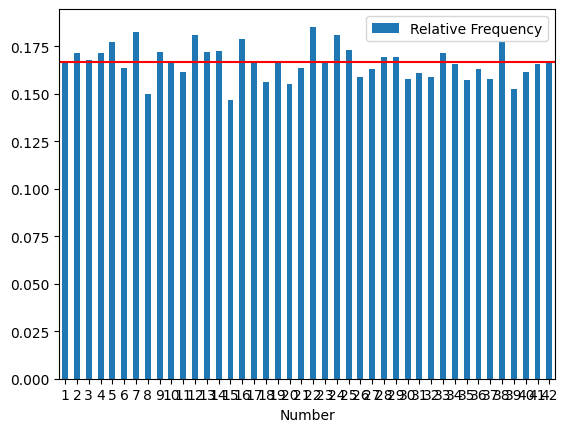

In [14]:
ax = data_lotto.plot.bar(x='Number', y='Relative Frequency', rot=0)
ax.axhline(y=7/42, color='r', linestyle='-')

In [11]:
data_lotto['Number'].iloc[data_lotto['Number of Drawings'].argmax()]

22

In [14]:
data_lotto.set_index('Number')['Number of Drawings'].idxmax()

22

## Pareto-Diagramme

Balken-Diagramme in absteigender Sortierung

In [15]:
data_phonedefects = pd.read_csv('data/PhoneDefects.csv')

In [16]:
data_phonedefects.head()

Type of Defect  Absolute Frequency Relative Frequency Cumulative Frequency
0     Incomplete                  48             41,74%               41,74%
1      Scratched                  32             27,83%               69,57%
2         Cracks                  23             20,00%               89,57%
3          Other                   8              6,96%               96,52%
4       Deformed                   4              3,48%              100,00%

In [17]:
data_phonedefects = percentstr2float(data_phonedefects, "Cumulative Frequency")
data_phonedefects = percentstr2float(data_phonedefects, "Relative Frequency")

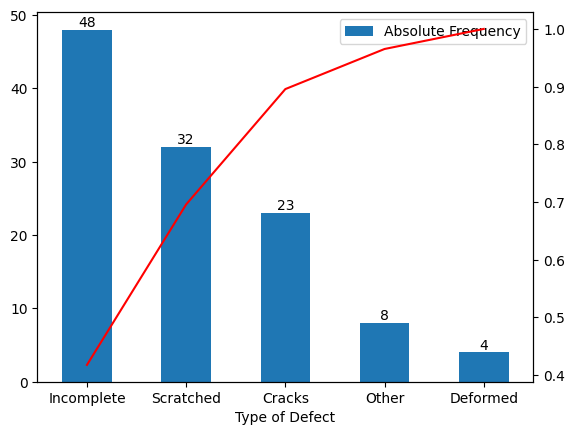

In [18]:
data_phonedefects = data_phonedefects.sort_values(by='Absolute Frequency', ascending=False)

ax1 = data_phonedefects.plot.bar(x='Type of Defect', y='Absolute Frequency', rot=0)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(data_phonedefects['Type of Defect'], data_phonedefects['Cumulative Frequency'], color='red')

for container in ax1.containers:
    ax1.bar_label(container)

plt.show()

<AxesSubplot: xlabel='Type of Defect'>

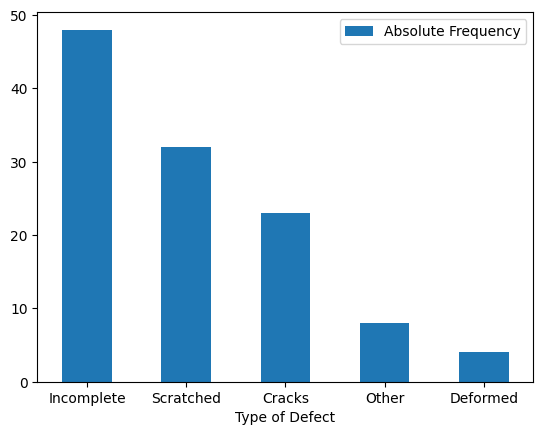

In [19]:
data_phonedefects.plot.bar(x='Type of Defect', y='Absolute Frequency', rot=0, stacked=True)

## Kreis-Diagramme

In [20]:
data_pets = pd.read_csv('data/Pets.csv')

In [21]:
data_pets.head()

Pet Proportion
0           Cat     34,44%
1           Dog     30,12%
2          Bird     19,17%
3  Small Mammal     10,64%
4         Other      5,64%

In [22]:
data_pets = percentstr2float(data_pets, "Proportion")

<AxesSubplot: ylabel='Proportion'>

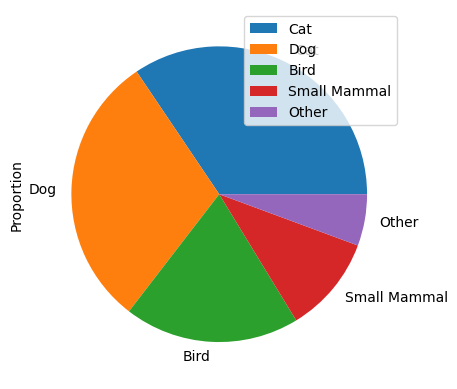

In [23]:
data_pets.plot.pie(y="Proportion", labels=data_pets['Pet'])

## Mosaik-Diagramme

Für Mosaik-Diagramme werden die Balken der dazugehörigen Balken-Diagramm über einander gestapelt. 

<AxesSubplot: >

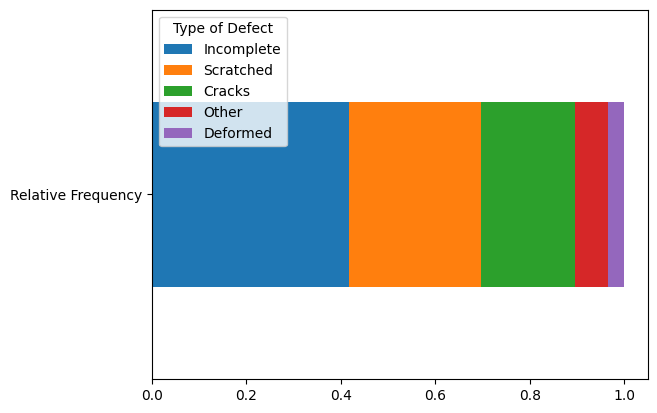

In [24]:
data_phonedefects[['Type of Defect', 'Relative Frequency']].set_index('Type of Defect').T.plot.barh(stacked=True)

## Kontingenz-Tabellen

In [25]:
data_spanish_wines.head()

Name Alcohol declared Alcohol measured Price Rating Price category  \
0   A0             12,5             12,9  4,88      E          Cheap   
1   A1             12,5             12,8  8,55      E      Expensive   
2   A2               13             13,1  5,85      E          Cheap   
3   A3             13,5             14,1  8,18     VG      Expensive   
4   A4             12,5             12,7  4,19     VG          Cheap   

           Price cat  
0  Cheap (< 6 euros)  
1  Moderately priced  
2  Cheap (< 6 euros)  
3  Moderately priced  
4  Cheap (< 6 euros)

In [26]:
pd.crosstab(data_spanish_wines['Price category'], 
            data_spanish_wines['Rating'],  
            margins=True)

Rating          E   F   G  P  VG  VP  All
Price category                           
Cheap           2  21   7  4   1   2   37
Expensive       1  14   9  5   4   0   33
All             3  35  16  9   5   2   70

In [27]:
pd.crosstab(data_spanish_wines['Price category'], 
            data_spanish_wines['Rating'], 
            normalize='all', 
            margins=True)

Rating                 E    F         G         P        VG        VP  \
Price category                                                          
Cheap           0.028571  0.3  0.100000  0.057143  0.014286  0.028571   
Expensive       0.014286  0.2  0.128571  0.071429  0.057143  0.000000   
All             0.042857  0.5  0.228571  0.128571  0.071429  0.028571   

Rating               All  
Price category            
Cheap           0.528571  
Expensive       0.471429  
All             1.000000

In [28]:
pd.crosstab(data_spanish_wines['Price category'], 
            data_spanish_wines['Rating'], 
            normalize='columns', 
            margins=True)

Rating                 E    F       G         P   VG   VP       All
Price category                                                     
Cheap           0.666667  0.6  0.4375  0.444444  0.2  1.0  0.528571
Expensive       0.333333  0.4  0.5625  0.555556  0.8  0.0  0.471429

In [29]:
pd.crosstab(data_spanish_wines['Price category'], 
            data_spanish_wines['Rating'], 
            normalize='index', 
            margins=True)

Rating                 E         F         G         P        VG        VP
Price category                                                            
Cheap           0.054054  0.567568  0.189189  0.108108  0.027027  0.054054
Expensive       0.030303  0.424242  0.272727  0.151515  0.121212  0.000000
All             0.042857  0.500000  0.228571  0.128571  0.071429  0.028571

## Stabdiagramme

In [30]:
data_noshows = pd.read_csv('data/NoShows.csv')

In [31]:
data_noshows.head()

Number of No-Shows Relative Frequency
0                   0                11%
1                   1                38%
2                   2                32%
3                   3                 9%
4                   4                 6%

In [32]:
data_noshows = percentstr2float(data_noshows, 'Relative Frequency').set_index('Number of No-Shows')

<AxesSubplot: xlabel='Number of No-Shows'>

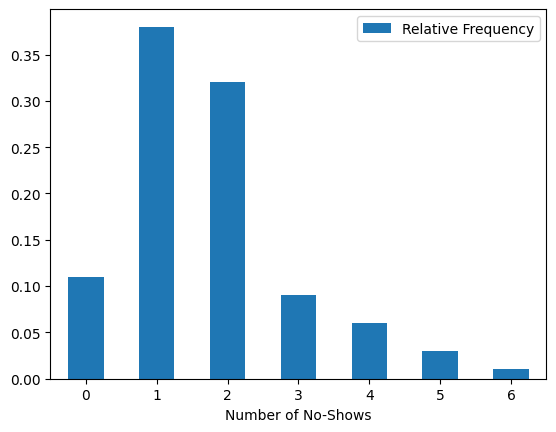

In [33]:
data_noshows.plot.bar(rot=0)

## Histogramme

In [34]:
data_breakingstrength = pd.read_csv('data/BreakingStrength.csv')

<AxesSubplot: ylabel='Frequency'>

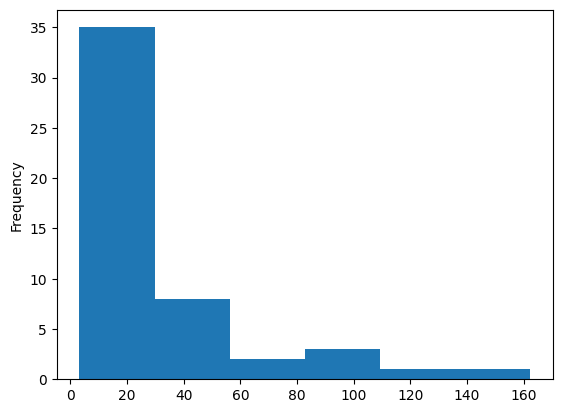

In [35]:
data_breakingstrength["Breaking Strength"].plot.hist(bins=6)

<AxesSubplot: ylabel='Frequency'>

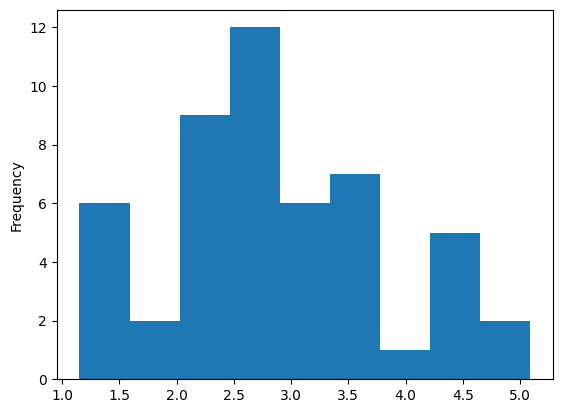

In [36]:
data_breakingstrength["Ln(Breaking Strength)"].plot.hist(bins=9)

## Streu-Diagramme

In [37]:
data_spanish_wines.head()

Name Alcohol declared Alcohol measured Price Rating Price category  \
0   A0             12,5             12,9  4,88      E          Cheap   
1   A1             12,5             12,8  8,55      E      Expensive   
2   A2               13             13,1  5,85      E          Cheap   
3   A3             13,5             14,1  8,18     VG      Expensive   
4   A4             12,5             12,7  4,19     VG          Cheap   

           Price cat  
0  Cheap (< 6 euros)  
1  Moderately priced  
2  Cheap (< 6 euros)  
3  Moderately priced  
4  Cheap (< 6 euros)

In [38]:
data_spanish_wines = comma2dot(data_spanish_wines, "Alcohol declared")
data_spanish_wines = comma2dot(data_spanish_wines, "Alcohol measured")
data_spanish_wines = comma2dot(data_spanish_wines, "Price")

<AxesSubplot: xlabel='Alcohol measured', ylabel='Price'>

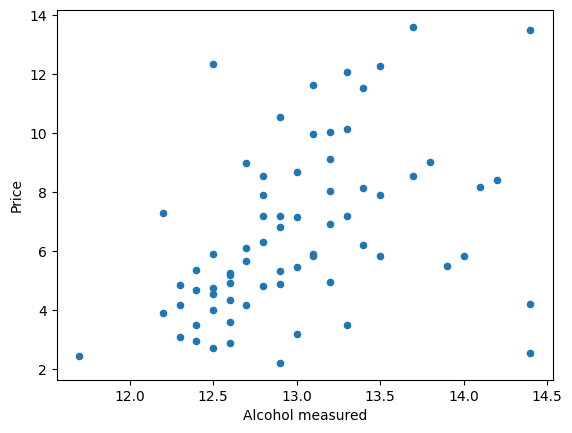

In [39]:
data_spanish_wines.plot.scatter(x='Alcohol measured', y='Price')

<AxesSubplot: xlabel='Alcohol measured', ylabel='Alcohol declared'>

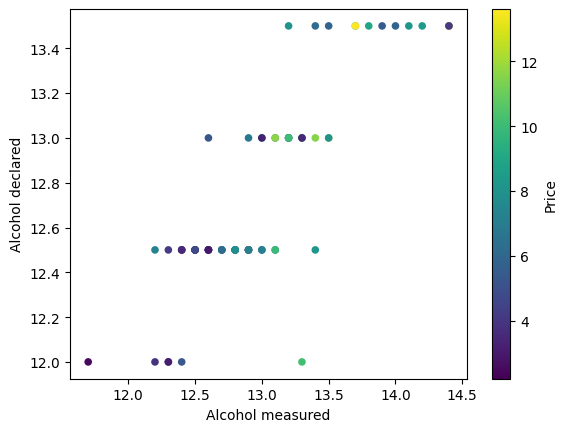

In [40]:
data_spanish_wines.plot.scatter(x='Alcohol measured', y='Alcohol declared', c='Price')